Instalamos algunas librerias

In [1]:
!pip install nltk
!pip install langdetect

                                              0.0/981.5 kB ? eta -:--:--
     --                                      71.7/981.5 kB 2.0 MB/s eta 0:00:01
     -------                                204.8/981.5 kB 3.1 MB/s eta 0:00:01
     -----------                            286.7/981.5 kB 2.5 MB/s eta 0:00:01
     -----------------                      450.6/981.5 kB 2.6 MB/s eta 0:00:01
     --------------------                   532.5/981.5 kB 2.6 MB/s eta 0:00:01
     ------------------------               645.1/981.5 kB 2.4 MB/s eta 0:00:01
     --------------------------             696.3/981.5 kB 2.4 MB/s eta 0:00:01
     -----------------------------          757.8/981.5 kB 2.3 MB/s eta 0:00:01
     ------------------------------         778.2/981.5 kB 2.0 MB/s eta 0:00:01
     ---------------------------------      860.2/981.5 kB 1.9 MB/s eta 0:00:01
     -------------------------------------  972.8/981.5 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 981

Cargamos el dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df_criticas = pd.read_csv("./train.csv",encoding='utf-8')
df = df_criticas.copy()
df.head(10)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
5,5,Probablemente mi película favorita de todos lo...,positivo
6,6,Seguro que me gustaría ver una resurrección de...,positivo
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo
8,8,Alentados por los comentarios positivos sobre ...,negativo
9,9,"Si te gusta la risa original desgarradora, te ...",positivo


Vemos que las reviews estan balanceadas 50/50 en negativas o positivas

Text(0.5, 1.0, 'Porcentaje en sentimiento')

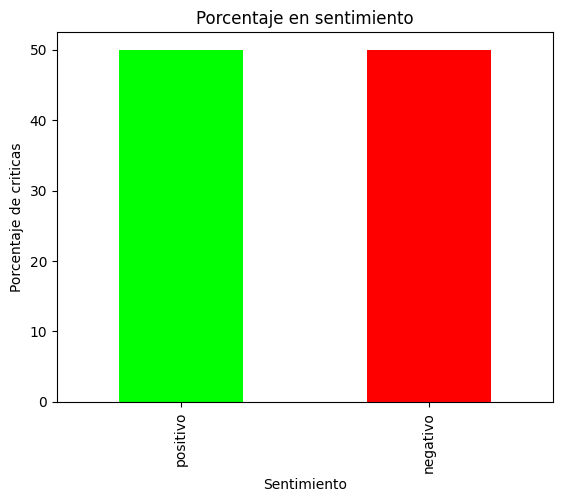

In [2]:
df_porcentaje = df['sentimiento'].value_counts(normalize=True)*100

df_porcentaje.plot(kind='bar',color=[(0,1,0),(1,0,0)])
plt.ylabel("Porcentaje de criticas")
plt.xlabel("Sentimiento")
plt.title("Porcentaje en sentimiento")

Vemos cuantas palabras tienen las reviews

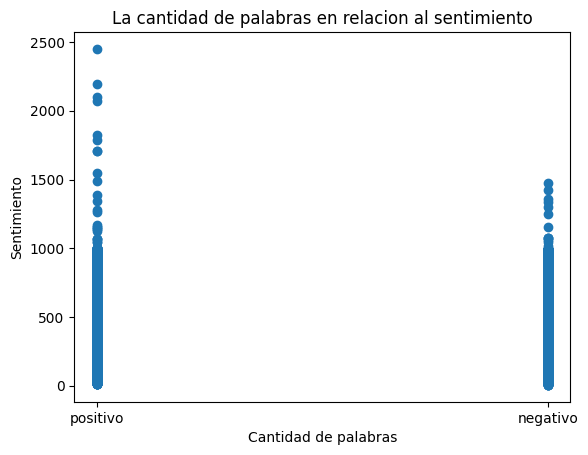

In [3]:
df['num_palabras'] = df['review_es'].str.split().apply(len)
plt.scatter(df['sentimiento'], df['num_palabras'])
plt.xlabel('Cantidad de palabras')
plt.ylabel('Sentimiento')
plt.title('La cantidad de palabras en relacion al sentimiento')
plt.show()

Nos quedamos únicamente  con las reviews en español

In [4]:
from langdetect import detect

indices = []

for i, fila in df.iterrows():
    review = fila['review_es']
    if detect(review) != 'es':
        indices.append(i)

df.iloc[indices]

,ID,review_es,sentimiento,num_palabras
156,156,From the film's first shot - Keira Knightley a...,negativo,832
249,249,'Airport 4' is basically a slopped together me...,negativo,115
250,250,"Supposedly a ""social commentary"" on racism and...",negativo,124
263,263,"There is a difference between a ""film,"" and a ...",negativo,906
264,264,please re-watch all 3 series and do not go see...,negativo,120
...,...,...,...,...
49772,49772,CitizenX(1995) is the developing world's answe...,positivo,961
49792,49792,"Thirty years after its initial release, the th...",positivo,861
49833,49833,THE SHOP AROUND THE CORNER is one of the sweet...,positivo,1138
49861,49861,"OK OK, it might be hard to put the entirety of...",negativo,954


In [5]:
df.drop(indices,inplace= True)

Ahora vamos a realizar un stemming para reducir las palabras a su raiz. Y con CountVectorizer vamos a convertir los textos stemmeados en una representación vectorial.

In [6]:
import nltk
nltk.download('stopwords')

from nltk.stem import SnowballStemmer

# Inicializar stemmer en español
stemmer = SnowballStemmer('spanish')
# Función para aplicar el stemming a una oración
def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)
# Aplicar el stemming a la columna df.review_es y guardar en una nueva columna
df['stemmed_review'] = df['review_es'].apply(stem_sentence)

df_tfid = df.copy()

vectorizer = CountVectorizer(min_df=0.1, max_df=0.7,token_pattern=r'\b(?:[^\d\W_])+\b')
X = vectorizer.fit_transform(df['stemmed_review'])
palabras = vectorizer.get_feature_names_out()

print(palabras)
print(len(palabras))
print(X.toarray())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LUCAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['absolut' 'accion' 'actor' 'actuacion' 'ahor' 'al' 'algo' 'algui' 'algun'
 'amig' 'antes' 'aqu' 'asi' 'aun' 'aunqu' 'años' 'baj' 'bastant' 'bien'
 'buen' 'cad' 'cas' 'casi' 'chic' 'ciert' 'cin' 'comedi' 'complet' 'cos'
 'cre' 'cualqui' 'cuand' 'cuent' 'deb' 'dec' 'dej' 'del' 'demasi' 'desd'
 'despues' 'dic' 'diferent' 'director' 'disfrut' 'divert' 'dond' 'dos'
 'durant' 'e' 'efect' 'ella' 'ellos' 'embarg' 'encant' 'encontr'
 'encuentr' 'entonc' 'entre' 'era' 'esa' 'escen' 'ese' 'eso' 'especial'
 'esper' 'est' 'estab' 'estad' 'estan' 'estar' 'estas' 'este' 'esto'
 'estoy' 'excelent' 'final' 'form' 'fue' 'fuer' 'general' 'gran' 'grand'
 'gust' 'ha' 'hab' 'habl' 'hac' 'han' 'hast' 'hay' 'he' 'hech' 'histori'
 'hiz' 'hombr' 'import' 'inclus' 'increibl' 'intent' 'interes' 'jueg'
 'jug' 'l' 'le' 'llam' 'llev' 'lueg' 'lug' 'mal' 'maner' 'mas' 'mayor'
 'me' 'mejor' 'men' 'mi' 'mientr' 'minut' 'mir' 'mism' 'moment' 'much'
 'muert' 'muy' 'n' 'nad' 'ni' 'ningun' 'niñ' 'nuev' 'nunc' 'o' 'observ'


Ahora teniendo el vector de para tokenizar cada texto vamos hacerlo agregando cada posición de este como una columna del dataset, de esta forma los modelos que utilicemos en el ensamble lo van a poder entender.

In [7]:
for i, palabra in enumerate(palabras):
    df[palabra] = X.toarray()[:, i]

df.head(10)

C:\Users\LUCAS\AppData\Local\Temp\ipykernel_14332\2652835665.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[palabra] = X.toarray()[:, i]
C:\Users\LUCAS\AppData\Local\Temp\ipykernel_14332\2652835665.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[palabra] = X.toarray()[:, i]
C:\Users\LUCAS\AppData\Local\Temp\ipykernel_14332\2652835665.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

,ID,review_es,sentimiento,num_palabras,stemmed_review,absolut,accion,actor,actuacion,ahor,...,uno,vec,ver,verdader,vez,vi,vid,vist,viv,ya
0,0,Uno de los otros críticos ha mencionado que de...,positivo,345,uno de los otros critic ha mencion que despues...,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,2
1,1,Una pequeña pequeña producción.La técnica de f...,positivo,161,una pequeñ pequeñ produccion.l tecnic de filma...,0,0,1,0,0,...,1,2,1,0,0,0,0,0,0,0
2,2,Pensé que esta era una manera maravillosa de p...,positivo,173,pens que esta era una maner maravill de pas ti...,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,"Básicamente, hay una familia donde un niño peq...",negativo,137,"basic , hay una famili dond un niñ pequeñ ( ja...",0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,237,el `` amor en el tiemp '' de pett mattei es un...,0,1,0,1,0,...,2,0,2,0,0,0,1,0,3,1
5,5,Probablemente mi película favorita de todos lo...,positivo,123,"probabl mi pelicul favorit de tod los tiemp , ...",0,0,0,0,0,...,1,1,1,1,0,0,0,1,0,0
6,6,Seguro que me gustaría ver una resurrección de...,positivo,157,segur que me gust ver una resurreccion de una ...,0,0,0,0,0,...,0,0,2,0,0,0,0,2,0,0
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo,168,"este espectacul fue una ide increibl , fresc e...",0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,1
8,8,Alentados por los comentarios positivos sobre ...,negativo,120,alent por los comentari posit sobr esta pelicu...,0,0,0,1,0,...,1,1,2,1,1,0,0,1,0,0
9,9,"Si te gusta la risa original desgarradora, te ...",positivo,31,"si te gust la ris original desgarr , te gust e...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Ensamble Hibrido Tipo Voting

Ahora separamos los vectores del resto de columnas que teniamos y dividimos en dataset en train test

In [8]:
df.drop(columns='ID',inplace=True)
df.drop(columns='review_es',inplace=True)
df.drop(columns='stemmed_review',inplace=True)

ds_x=df.drop(['sentimiento'], axis='columns', inplace=False)
ds_y = df['sentimiento'].copy()

x_train, x_test, y_train, y_test = train_test_split(ds_x,
                                                    ds_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=4, #semilla
                                                    stratify=df["sentimiento"].values)

In [9]:
import numpy as np
import sklearn as sk

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.stats import uniform, randint

from sklearn.tree import export_graphviz

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, precision_recall_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier


import xgboost as xgb
import warnings
warnings.filterwarnings('always')

Abrimos el Random Forest y el XGBoost que conseguimos anteriormente con los mejores hiperparametros encontrados de cada uno.

In [10]:
# Cargamos el modelo
import joblib
filename = 'modelos/Random_Forest.sav'
random_forest = joblib.load(filename)

filename_xgb = 'modelos/xgb_model.sav'
xgboost = joblib.load(filename_xgb)

In [12]:
#Creo clasificadores
#KNN
des_tree_clf = DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 15, 
                                         min_samples_leaf=10,
                                         ccp_alpha=0.01)

#Creo ensemble de Votación
vot_clf_count = VotingClassifier(estimators = [('xgb', xgboost), ('rnd', random_forest), ('knn', des_tree_clf)], voting = 'soft', weights=[2,1,1])


#Entreno el ensemble
vot_clf_count.fit(x_train, y_train)

#Evaluo en conjunto de test
pred = vot_clf_count.predict(x_test)

In [13]:
#Calculo el acuracy del modelo
accuracy=accuracy_score(y_test,pred)
print("Accuracy: "+str(accuracy))

Accuracy: 0.7661708751297129


Ahora veremos el resto de metricas

AUC: 0.8466076850330995
F1 Score: 0.7729715206878023
Accuracy Score: 0.7661708751297129
Recall Score: 0.7975051975051975
Precision Score: 0.7499022546591946


c:\Users\LUCAS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:219: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.cmap = mpl.cm.get_cmap(cmap)


              precision    recall  f1-score   support

    negativo       0.78      0.73      0.76      7240
    positivo       0.75      0.80      0.77      7215

    accuracy                           0.77     14455
   macro avg       0.77      0.77      0.77     14455
weighted avg       0.77      0.77      0.77     14455



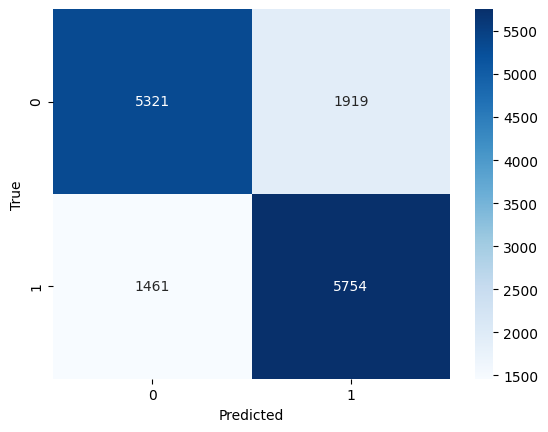

In [14]:
#Evaluo en el set de test
pred_proba= vot_clf_count.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, pred_proba))

#Matriz de Confusion
pred=vot_clf_count.predict(x_test)

print(f"F1 Score: {f1_score(y_test,pred, pos_label= 'positivo')}")
print(f"Accuracy Score: {accuracy_score(y_test,pred)}")
print(f"Recall Score: {recall_score(y_test,pred, pos_label='positivo')}")
print(f"Precision Score: {precision_score(y_test,pred, pos_label='positivo')}")

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,pred))

## TFID

A continuacion haremos lo mismo pero utilizando otro tipo de tokenizacion. En este caso sera con TfidVectorizer

In [15]:
vectorizer_tfid = TfidfVectorizer(min_df=0.1, max_df=0.7,token_pattern=r'\b(?:[^\d\W_])+\b')
X_tfid = vectorizer_tfid.fit_transform(df_tfid['stemmed_review'])
palabras_tfid = vectorizer_tfid.get_feature_names_out()

print(palabras_tfid)
print(len(palabras_tfid))
print(X_tfid.toarray())

['absolut' 'accion' 'actor' 'actuacion' 'ahor' 'al' 'algo' 'algui' 'algun'
 'amig' 'antes' 'aqu' 'asi' 'aun' 'aunqu' 'años' 'baj' 'bastant' 'bien'
 'buen' 'cad' 'cas' 'casi' 'chic' 'ciert' 'cin' 'comedi' 'complet' 'cos'
 'cre' 'cualqui' 'cuand' 'cuent' 'deb' 'dec' 'dej' 'del' 'demasi' 'desd'
 'despues' 'dic' 'diferent' 'director' 'disfrut' 'divert' 'dond' 'dos'
 'durant' 'e' 'efect' 'ella' 'ellos' 'embarg' 'encant' 'encontr'
 'encuentr' 'entonc' 'entre' 'era' 'esa' 'escen' 'ese' 'eso' 'especial'
 'esper' 'est' 'estab' 'estad' 'estan' 'estar' 'estas' 'este' 'esto'
 'estoy' 'excelent' 'final' 'form' 'fue' 'fuer' 'general' 'gran' 'grand'
 'gust' 'ha' 'hab' 'habl' 'hac' 'han' 'hast' 'hay' 'he' 'hech' 'histori'
 'hiz' 'hombr' 'import' 'inclus' 'increibl' 'intent' 'interes' 'jueg'
 'jug' 'l' 'le' 'llam' 'llev' 'lueg' 'lug' 'mal' 'maner' 'mas' 'mayor'
 'me' 'mejor' 'men' 'mi' 'mientr' 'minut' 'mir' 'mism' 'moment' 'much'
 'muert' 'muy' 'n' 'nad' 'ni' 'ningun' 'niñ' 'nuev' 'nunc' 'o' 'observ'


In [16]:
for i, palabra in enumerate(palabras_tfid):
    df_tfid[palabra] = X_tfid.toarray()[:, i]

df_tfid.head(10)

C:\Users\LUCAS\AppData\Local\Temp\ipykernel_14332\2812003682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tfid[palabra] = X_tfid.toarray()[:, i]
C:\Users\LUCAS\AppData\Local\Temp\ipykernel_14332\2812003682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tfid[palabra] = X_tfid.toarray()[:, i]
C:\Users\LUCAS\AppData\Local\Temp\ipykernel_14332\2812003682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

,ID,review_es,sentimiento,num_palabras,stemmed_review,absolut,accion,actor,actuacion,ahor,...,uno,vec,ver,verdader,vez,vi,vid,vist,viv,ya
0,0,Uno de los otros críticos ha mencionado que de...,positivo,345,uno de los otros critic ha mencion que despues...,0.0,0.000000,0.000000,0.000000,0.000000,...,0.102802,0.000000,0.081831,0.000000,0.000000,0.000000,0.000000,0.098727,0.000000,0.200899
1,1,Una pequeña pequeña producción.La técnica de f...,positivo,161,una pequeñ pequeñ produccion.l tecnic de filma...,0.0,0.000000,0.129343,0.000000,0.000000,...,0.123699,0.304153,0.098465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,Pensé que esta era una manera maravillosa de p...,positivo,173,pens que esta era una maner maravill de pas ti...,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.091976,0.000000,0.000000,0.000000,0.000000,0.110967,0.000000,0.000000
3,3,"Básicamente, hay una familia donde un niño peq...",negativo,137,"basic , hay una famili dond un niñ pequeñ ( ja...",0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.134318,0.000000,0.000000,0.219385,0.174717,0.000000,0.000000,0.000000
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,237,el `` amor en el tiemp '' de pett mattei es un...,0.0,0.116731,0.000000,0.086658,0.000000,...,0.178432,0.000000,0.142032,0.000000,0.000000,0.000000,0.092375,0.000000,0.351144,0.087175
5,5,Probablemente mi película favorita de todos lo...,positivo,123,"probabl mi pelicul favorit de tod los tiemp , ...",0.0,0.000000,0.000000,0.000000,0.000000,...,0.161920,0.199066,0.128889,0.203432,0.000000,0.000000,0.000000,0.155502,0.000000,0.000000
6,6,Seguro que me gustaría ver una resurrección de...,positivo,157,segur que me gust ver una resurreccion de una ...,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.166386,0.000000,0.000000,0.000000,0.000000,0.200742,0.000000,0.000000
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo,168,"este espectacul fue una ide increibl , fresc e...",0.0,0.000000,0.000000,0.102095,0.124488,...,0.000000,0.000000,0.000000,0.132055,0.093142,0.000000,0.000000,0.000000,0.000000,0.102703
8,8,Alentados por los comentarios positivos sobre ...,negativo,120,alent por los comentari posit sobr esta pelicu...,0.0,0.000000,0.000000,0.138878,0.000000,...,0.142978,0.175778,0.227622,0.179633,0.126701,0.000000,0.000000,0.137311,0.000000,0.000000
9,9,"Si te gusta la risa original desgarradora, te ...",positivo,31,"si te gust la ris original desgarr , te gust e...",0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
df_tfid.drop(columns='ID',inplace=True)
df_tfid.drop(columns='review_es',inplace=True)
df_tfid.drop(columns='stemmed_review',inplace=True)

ds_x=df_tfid.drop(['sentimiento'], axis='columns', inplace=False)
ds_y = df_tfid['sentimiento'].copy()

x_train, x_test, y_train, y_test = train_test_split(ds_x,
                                                    ds_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=4, #semilla
                                                    stratify=df["sentimiento"].values)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, precision_recall_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
import warnings
warnings.filterwarnings('always')

In [20]:
# Cargamos el modelo
import joblib
filename = 'modelos/Random_Forest.sav'
random_forest = joblib.load(filename)

filename_xgb = 'modelos/xgb_model.sav'
xgboost = joblib.load(filename_xgb)

In [21]:
#Creo clasificadores
#KNN
des_tree_clf = DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 15, 
                                         min_samples_leaf=10,
                                         ccp_alpha=0.01)

#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('xgb', xgboost), ('rnd', random_forest), ('knn', des_tree_clf)], voting = 'soft', weights=[2,1,1])


#Entreno el ensemble
vot_clf.fit(x_train, y_train)

#Evaluo en conjunto de test
pred = vot_clf.predict(x_test)

In [22]:
#Calculo el accuracy
accuracy=accuracy_score(y_test,pred)

print("Accuracy: "+str(accuracy))

Accuracy: 0.764718090626081


Vemos el resto de las metricas

AUC: 0.8464070211307779
F1 Score: 0.770961007475251
Accuracy Score: 0.764718090626081
Recall Score: 0.7933471933471934
Precision Score: 0.749803510610427


c:\Users\LUCAS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:219: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.cmap = mpl.cm.get_cmap(cmap)


              precision    recall  f1-score   support

    negativo       0.78      0.74      0.76      7240
    positivo       0.75      0.79      0.77      7215

    accuracy                           0.76     14455
   macro avg       0.77      0.76      0.76     14455
weighted avg       0.77      0.76      0.76     14455



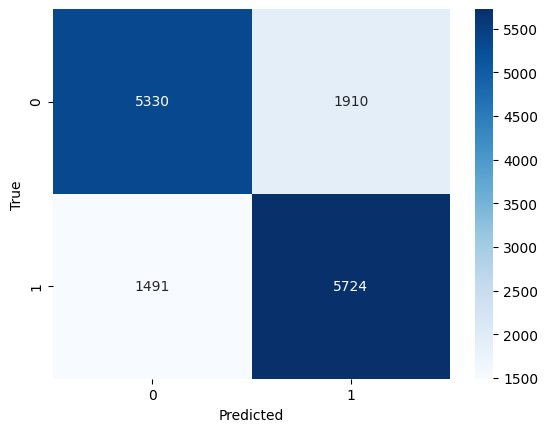

In [23]:
#Evaluo en el set de test
pred_proba= vot_clf.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, pred_proba))

#Matriz de Confusion
pred=vot_clf.predict(x_test)

print(f"F1 Score: {f1_score(y_test,pred, pos_label= 'positivo')}")
print(f"Accuracy Score: {accuracy_score(y_test,pred)}")
print(f"Recall Score: {recall_score(y_test,pred, pos_label='positivo')}")
print(f"Precision Score: {precision_score(y_test,pred, pos_label='positivo')}")

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,pred))

Como podemos ver los resultados del ensamble utilizando CountVectorizer y TfidVectorizer son muy parecidos. Nos quedaremos con CountVectorizer.

## Guardamos el modelo

In [24]:
# Guardar el arbol
import joblib
filename = 'EnsambleVoting_v2.sav'
joblib.dump(vot_clf_count, filename)

['EnsambleVoting_v2.sav']

## Predict de kaggle

Ahora haremos el predict para kaggle

In [25]:
df_criticas_test = pd.read_csv('./test.csv')
df_test = df_criticas_test.copy()
df_test['stemmed_review'] = df_test['review_es'].apply(stem_sentence)
df_test.head(10)

,ID,review_es,stemmed_review
0,60000,La mayor virtud de esta película es su existen...,la mayor virtud de esta pelicul es su existenc...
1,60001,"No soy un experto cinéfilo, pero pocas veces m...","no soy un expert cinefil , per poc vec me hab ..."
2,60002,Si no eres un incondicional del humor estilo T...,si no eres un incondicional del humor estil te...
3,60003,"No sé qué está pasando, si la gente se deja ll...","no se que esta pas , si la gent se dej llev po..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ...","per cuand amanec , y me qued sol , sient en el..."
5,60005,La llegada de Rafa a Euskadi es como ponerse a...,la lleg de raf a euskadi es com pon a ver 8 ap...
6,60006,El nivel del cine y lo peor la capacidad intel...,el nivel del cin y lo peor la capac intelectua...
7,60007,Es triste ver una película como ésta y escucha...,es trist ver una pelicul com esta y escuch a t...
8,60008,Puedo entender que Torrente I y II y Lo imposi...,pued entend que torrent i y ii y lo impos fuer...
9,60009,"-Ahivalohostia, Txomin, qué montón de gente ri...","-ahivalohosti , txomin , que monton de gent ri..."


In [26]:
df_test['num_palabras'] = df_test['stemmed_review'].str.split().apply(len)

vectorizer = CountVectorizer(vocabulary=palabras)
matriz_caracteristicas_test = vectorizer.fit_transform(df_test['stemmed_review'])

for i, palabra in enumerate(palabras):
    df_test[palabra] = matriz_caracteristicas_test.toarray()[:, i]


_df_test = df_test.drop(columns='ID',inplace=False)
_df_test.drop(columns='review_es',inplace=True)
_df_test.drop(columns='stemmed_review',inplace=True)

_df_test.head(10)

C:\Users\LUCAS\AppData\Local\Temp\ipykernel_14332\1514846974.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[palabra] = matriz_caracteristicas_test.toarray()[:, i]
C:\Users\LUCAS\AppData\Local\Temp\ipykernel_14332\1514846974.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[palabra] = matriz_caracteristicas_test.toarray()[:, i]
C:\Users\LUCAS\AppData\Local\Temp\ipykernel_14332\1514846974.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

,num_palabras,absolut,accion,actor,actuacion,ahor,al,algo,algui,algun,...,uno,vec,ver,verdader,vez,vi,vid,vist,viv,ya
0,909,1,0,0,0,0,5,0,0,0,...,1,0,2,0,0,0,1,1,0,2
1,236,0,0,1,0,0,0,1,0,2,...,0,1,2,0,0,0,1,0,0,0
2,141,0,0,0,0,0,1,0,0,2,...,0,0,0,0,1,0,0,0,0,0
3,354,0,0,0,0,1,5,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,346,0,0,0,0,1,1,0,0,0,...,0,0,2,0,1,0,0,0,0,0
5,446,1,1,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
6,113,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,389,0,0,0,0,0,2,0,0,2,...,2,0,2,0,0,0,0,0,1,0
8,188,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,722,1,0,1,0,1,1,0,0,1,...,1,0,2,0,0,0,0,2,0,2


In [27]:
pred_kaggle_vot = vot_clf_count.predict(_df_test)
df_kaggle_rf = pd.DataFrame({'ID': df_test['ID'], 'sentimiento': pred_kaggle_vot})
df_kaggle_rf.head(10)

,ID,sentimiento
0,60000,negativo
1,60001,positivo
2,60002,positivo
3,60003,negativo
4,60004,positivo
5,60005,negativo
6,60006,negativo
7,60007,negativo
8,60008,negativo
9,60009,positivo


In [28]:
df_kaggle_rf.shape[0]

8599

In [29]:
df_kaggle_rf.to_csv('pred_kaggle_voting_5.csv', index=False)